In [1]:
from ipynb.fs.full.TARGET_Analysis_Functions import *
from scipy.stats import chi2_contingency

# MYCN amplification and IFITM3 expression analysis

Not Amplified v.s. Amplified: t-test independent samples, P_val=2.402e-06 stat=4.832e+00


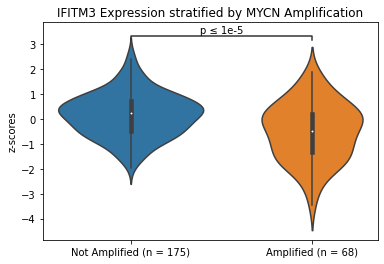

Not Amplified: median = 0.2448, mean = 0.17598514285714284, 95% CI = (0.04593926302526202, 0.30603102268902366)
Amplified: median = -0.47245, mean = -0.49029264705882364, 95% CI = (-0.766222009077939, -0.2143632850397082)


In [2]:
MYCN_groups = stratifyCategoricalSampleData('MYCN', 'Not Amplified', 'Amplified')
compareExpression2('IFITM3', MYCN_groups,'MYCN Amplification',['Not Amplified','Amplified'],'t-test_ind')

Low v.s. Intermediate: t-test independent samples, P_val=1.589e-04 stat=3.863e+00
Intermediate v.s. High: t-test independent samples, P_val=1.077e-01 stat=1.617e+00
Low v.s. High: t-test independent samples, P_val=3.132e-06 stat=4.848e+00


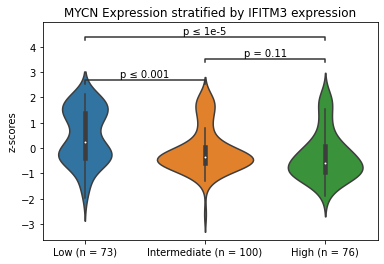

Low: median = 0.22699999999999998, mean = 0.47159589041095895, 95% CI = (0.22905633382830393, 0.714135446993614)
Intermediate: median = -0.35155000000000003, mean = -0.09915000000000002, 95% CI = (-0.27205017475361176, 0.07375017475361173)
High: median = -0.5729500000000001, mean = -0.32252368421052635, 95% CI = (-0.5339843247860983, -0.1110630436349545)


In [3]:
IFITM3_groups = stratifyDataOnGeneExpression2('IFITM3',-0.5,0.5)
compareExpression2('MYCN',IFITM3_groups,'IFITM3 expression',['Low','Intermediate','High'],'t-test_ind')

Low v.s. Intermediate: t-test independent samples, P_val=3.304e-04 stat=3.660e+00
Intermediate v.s. High: t-test independent samples, P_val=5.223e-03 stat=2.833e+00
Low v.s. High: t-test independent samples, P_val=2.772e-07 stat=5.376e+00


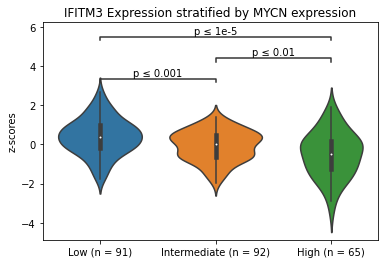

Low: median = 0.3836, mean = 0.4060120879120879, 95% CI = (0.21501941441950675, 0.5970047614046691)
Intermediate: median = 0.028900000000000002, mean = -0.05664782608695652, 95% CI = (-0.21481874987344274, 0.10152309769952972)
High: median = -0.5002, mean = -0.4929907692307692, 95% CI = (-0.7740037909050055, -0.21197774755653292)


In [4]:
MYCN_expression_groups = stratifyDataOnGeneExpression2('MYCN',-0.5,0.5)
compareExpression2('IFITM3',MYCN_expression_groups,'MYCN expression',['Low','Intermediate','High'],'t-test_ind')

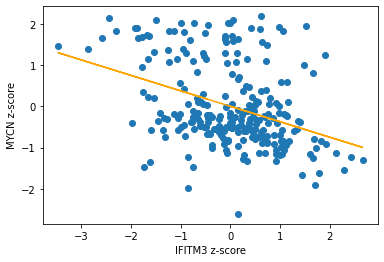

Pearson correlation coefficient = -0.3740288073684074
p-value = 1.0941072984374612e-09


In [5]:
geneScatter('IFITM3','MYCN')

In [6]:
labels = ['low','intermediate','high']
IFITM3_groups = stratifyDataOnGeneExpression2('IFITM3',-0.5,0.5)
for i in range(len(IFITM3_groups)):
    samples = clinical_sample_trimmed.loc[clinical_sample_trimmed['Sample Identifier'].isin(IFITM3_groups[i])]
    amplified_MYCN_count = sum(samples['MYCN']=='Amplified')
    amplified_MYCN_prop = amplified_MYCN_count/len(samples)
    print("Number of MYCN amplified tumors in " + labels[i] + " IFITM3 expression group: " + str(amplified_MYCN_count) + "/" + str(len(samples)))
    print("Proportion of MYCN amplified tumors in " + labels[i] + " IFITM3 expression group: " + str(amplified_MYCN_prop))
    
    
    


Number of MYCN amplified tumors in low IFITM3 expression group: 34/73
Proportion of MYCN amplified tumors in low IFITM3 expression group: 0.4657534246575342
Number of MYCN amplified tumors in intermediate IFITM3 expression group: 20/100
Proportion of MYCN amplified tumors in intermediate IFITM3 expression group: 0.2
Number of MYCN amplified tumors in high IFITM3 expression group: 14/76
Proportion of MYCN amplified tumors in high IFITM3 expression group: 0.18421052631578946


In [7]:
#Chi-Squared Test comparing all three groups
contingency_table = [[39,80,62],[34,20,14]]
stat, p, dof, expected = chi2_contingency(contingency_table)
print("p-value from Chi-Squared Test: " + str(p))

p-value from Chi-Squared Test: 6.235285403626489e-05


# Comparing EFS based on both IFITM3 expression and MYCN amplification

### Comparing EFS in MYCN nonamplified samples based on IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=2.551e-01 stat=-1.144e+00
Intermediate v.s. High: t-test independent samples, P_val=4.807e-03 stat=2.868e+00
Low v.s. High: t-test independent samples, P_val=1.827e-01 stat=1.342e+00


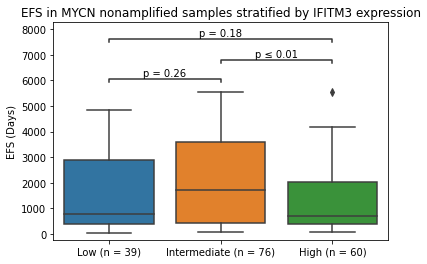

Low: median = 798.0, mean = 1680.2820512820513, 95% CI = (1190.6803038766993, 2169.883798687403)
Intermediate: median = 1737.0, mean = 2054.8552631578946, 95% CI = (1669.9951042458906, 2439.7154220698985)
High: median = 708.5, mean = 1300.3666666666666, 95% CI = (985.6638186921064, 1615.0695146412268)


In [8]:
#Stratify samples based on MYCN amplification status
MYCN_groups = stratifyCategoricalSampleData('MYCN', 'Not Amplified', 'Amplified')

#Find z-scores for MYCN nonamplified samples
nonamplified_MYCN_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(MYCN_groups[0]).intersection(z_scores.columns))
nonamplified_MYCN_z_scores = z_scores[nonamplified_MYCN_columns]

#Obtain the IFITM3 z-scores in nonamplified MYCN samples
IFITM3_MYCN_nonamplified_z_scores = nonamplified_MYCN_z_scores.loc[nonamplified_MYCN_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_IFITM3_MYCN_nonamplified_samples = IFITM3_MYCN_nonamplified_z_scores.loc[IFITM3_MYCN_nonamplified_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_IFITM3_MYCN_nonamplified_samples = IFITM3_MYCN_nonamplified_z_scores.loc[IFITM3_MYCN_nonamplified_z_scores.iloc[:,0] > -0.5]
intermediate_IFITM3_MYCN_nonamplified_samples = intermediate_IFITM3_MYCN_nonamplified_samples.loc[intermediate_IFITM3_MYCN_nonamplified_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_IFITM3_MYCN_nonamplified_samples = IFITM3_MYCN_nonamplified_z_scores.loc[IFITM3_MYCN_nonamplified_z_scores.iloc[:,0] > 0.5].index

data = [low_IFITM3_MYCN_nonamplified_samples, intermediate_IFITM3_MYCN_nonamplified_samples, high_IFITM3_MYCN_nonamplified_samples]
compareEFS2(data,'EFS in MYCN nonamplified samples stratified by IFITM3 expression',['Low','Intermediate','High'],'t-test_ind')
       




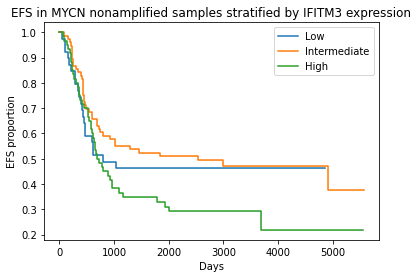

Log Rank Test between Low and Intermediate


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.39 0.53      0.91

Log Rank Test between Low and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.31 0.25      1.99

Log Rank Test between Intermediate and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.18 0.02      5.45

In [9]:
kaplanmeierEFS2(data,'EFS in MYCN nonamplified samples stratified by IFITM3 expression',['Low','Intermediate','High'])




Remaining samples v.s. High IFITM3 samples: t-test independent samples, P_val=1.107e-02 stat=2.568e+00


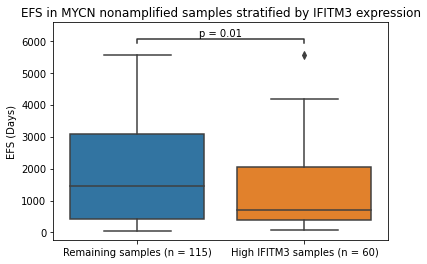

Remaining samples: median = 1446.0, mean = 1927.8260869565217, 95% CI = (1623.5957549482798, 2232.056418964764)
High IFITM3 samples: median = 708.5, mean = 1300.3666666666666, 95% CI = (985.6638186921064, 1615.0695146412268)


In [10]:
not_high_IFITM3_MYCN_nonamplified_samples = IFITM3_MYCN_nonamplified_z_scores.loc[IFITM3_MYCN_nonamplified_z_scores.iloc[:,0] < 0.5].index
data = [not_high_IFITM3_MYCN_nonamplified_samples,high_IFITM3_MYCN_nonamplified_samples]
compareEFS2(data,'EFS in MYCN nonamplified samples stratified by IFITM3 expression',['Remaining samples','High IFITM3 samples'],'t-test_ind')



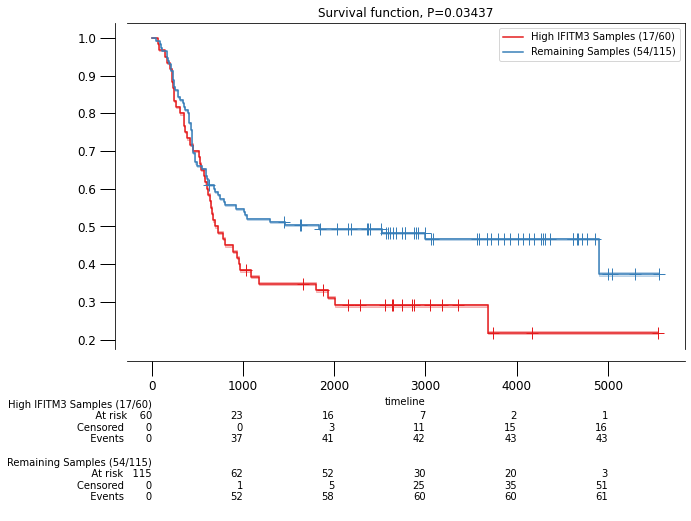

In [11]:
kaplanmeierEFS(data,'Remaining Samples','High IFITM3 Samples')

### Comparing MYCN expression in MYCN nonamplified samples based on IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=5.496e-01 stat=6.001e-01
Intermediate v.s. High: t-test independent samples, P_val=3.143e-02 stat=2.174e+00
Low v.s. High: t-test independent samples, P_val=3.040e-02 stat=2.197e+00


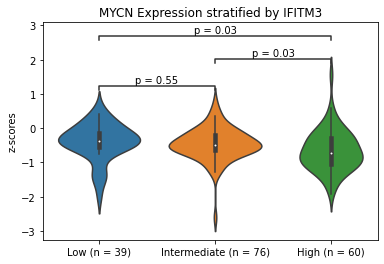

Low: median = -0.3662, mean = -0.39465384615384613, 95% CI = (-0.5616643089684483, -0.22764338333924392)
Intermediate: median = -0.499, mean = -0.45309342105263156, 95% CI = (-0.559674923995419, -0.34651191810984416)
High: median = -0.7305, mean = -0.6516566666666666, 95% CI = (-0.80121244931614, -0.5021008840171931)


In [12]:
data = [low_IFITM3_MYCN_nonamplified_samples, intermediate_IFITM3_MYCN_nonamplified_samples, high_IFITM3_MYCN_nonamplified_samples]
compareExpression2('MYCN',data,'IFITM3',['Low','Intermediate','High'],'t-test_ind')




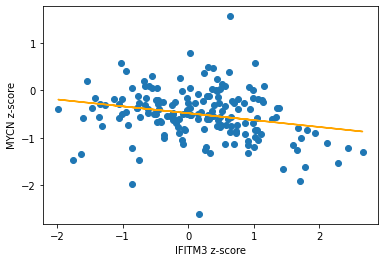

Pearson correlation coefficient = -0.23726613351114625
p-value = 0.0015695233048638063


In [13]:
#Stratify samples based on MYCN amplification status
MYCN_groups = stratifyCategoricalSampleData('MYCN', 'Not Amplified', 'Amplified')

#Find z-scores for MYCN nonamplified samples
nonamplified_MYCN_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(MYCN_groups[0]).intersection(z_scores.columns))
nonamplified_MYCN_z_scores = z_scores[nonamplified_MYCN_columns]

#Obtain the IFITM3 z-scores in nonamplified MYCN samples
IFITM3_MYCN_nonamplified_z_scores = nonamplified_MYCN_z_scores.loc[nonamplified_MYCN_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()

#Obtain the MYCN z-scores in nonamplified MYCN samples
MYCN_MYCN_nonamplified_z_scores = nonamplified_MYCN_z_scores.loc[nonamplified_MYCN_z_scores['Hugo_Symbol']=='MYCN'].iloc[:,2:].transpose()

plt.scatter(IFITM3_MYCN_nonamplified_z_scores,MYCN_MYCN_nonamplified_z_scores)
plt.xlabel('IFITM3 z-score')
plt.ylabel('MYCN z-score')
m,b = np.polyfit(IFITM3_MYCN_nonamplified_z_scores.iloc[:,0].values,MYCN_MYCN_nonamplified_z_scores.iloc[:,0].values,1)
plt.plot(IFITM3_MYCN_nonamplified_z_scores, m*(IFITM3_MYCN_nonamplified_z_scores.iloc[:,0].values) + b, 'orange')
plt.show()

corr,pvalue = st.pearsonr(IFITM3_MYCN_nonamplified_z_scores.iloc[:,0].tolist(),MYCN_MYCN_nonamplified_z_scores.iloc[:,0].tolist())
print('Pearson correlation coefficient = ' + str(corr))
print('p-value = ' + str(pvalue))


### Comparing EFS in MYCN amplified samples based on MYCN amplification status

Low v.s. Intermediate: t-test independent samples, P_val=7.503e-01 stat=3.199e-01
Intermediate v.s. High: t-test independent samples, P_val=8.911e-01 stat=1.380e-01
Low v.s. High: t-test independent samples, P_val=6.839e-01 stat=4.097e-01


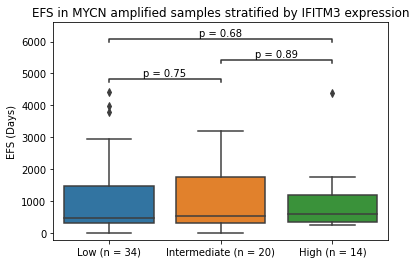

Low: median = 454.5, mean = 1139.1176470588234, 95% CI = (708.1539220682694, 1570.0813720493775)
Intermediate: median = 526.0, mean = 1030.35, 95% CI = (564.7093211778317, 1495.990678822168)
High: median = 593.0, mean = 978.2857142857143, 95% CI = (396.3481813164026, 1560.223247255026)


In [14]:
#Find z-scores for MYCN amplified samples
amplified_MYCN_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(MYCN_groups[1]).intersection(z_scores.columns))
amplified_MYCN_z_scores = z_scores[amplified_MYCN_columns]

#Obtain the IFITM3 z-scores in amplified MYCN samples
IFITM3_MYCN_amplified_z_scores = amplified_MYCN_z_scores.loc[amplified_MYCN_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_IFITM3_MYCN_amplified_samples = IFITM3_MYCN_amplified_z_scores.loc[IFITM3_MYCN_amplified_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_IFITM3_MYCN_amplified_samples = IFITM3_MYCN_amplified_z_scores.loc[IFITM3_MYCN_amplified_z_scores.iloc[:,0] > -0.5]
intermediate_IFITM3_MYCN_amplified_samples = intermediate_IFITM3_MYCN_amplified_samples.loc[intermediate_IFITM3_MYCN_amplified_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_IFITM3_MYCN_amplified_samples = IFITM3_MYCN_amplified_z_scores.loc[IFITM3_MYCN_amplified_z_scores.iloc[:,0] > 0.5].index

data = [low_IFITM3_MYCN_amplified_samples, intermediate_IFITM3_MYCN_amplified_samples, high_IFITM3_MYCN_amplified_samples]
compareEFS2(data,'EFS in MYCN amplified samples stratified by IFITM3 expression',['Low','Intermediate','High'],'t-test_ind')
       


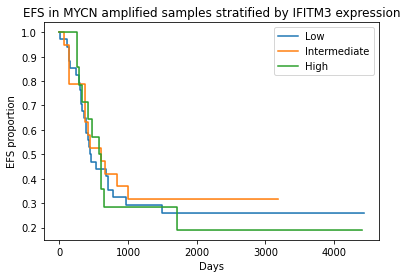

Log Rank Test between Low and Intermediate


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.12 0.73      0.46

Log Rank Test between Low and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.01 0.93      0.10

Log Rank Test between Intermediate and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.14 0.70      0.51

In [15]:
kaplanmeierEFS2(data,'EFS in MYCN amplified samples stratified by IFITM3 expression',['Low','Intermediate','High'])

Remaining samples v.s. High IFITM3 samples: t-test independent samples, P_val=7.345e-01 stat=3.406e-01


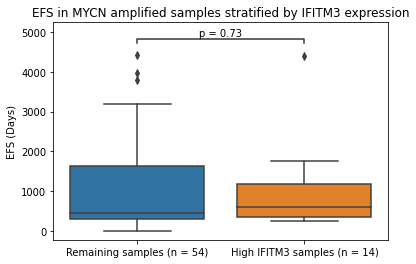

Remaining samples: median = 454.5, mean = 1098.8333333333333, 95% CI = (779.7713814427566, 1417.89528522391)
High IFITM3 samples: median = 593.0, mean = 978.2857142857143, 95% CI = (396.3481813164026, 1560.223247255026)


In [16]:
not_high_IFITM3_MYCN_amplified_samples = IFITM3_MYCN_amplified_z_scores.loc[IFITM3_MYCN_amplified_z_scores.iloc[:,0] < 0.5].index
data = [not_high_IFITM3_MYCN_amplified_samples,high_IFITM3_MYCN_amplified_samples]
compareEFS2(data,'EFS in MYCN amplified samples stratified by IFITM3 expression',['Remaining samples','High IFITM3 samples'],'t-test_ind')



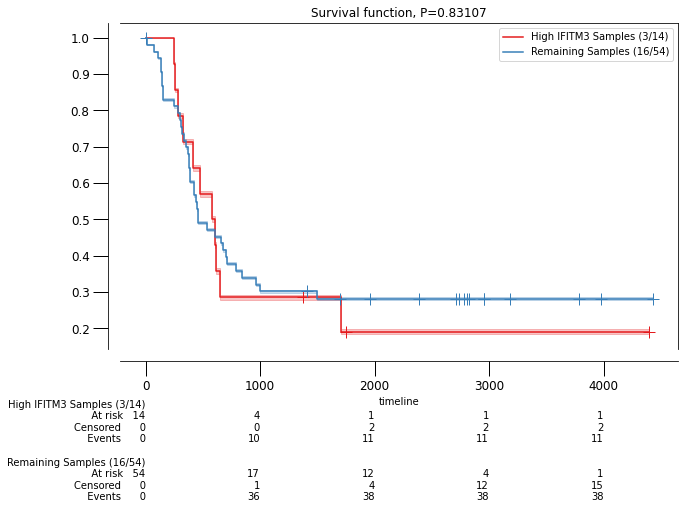

In [17]:
kaplanmeierEFS(data,'Remaining Samples','High IFITM3 Samples')

### Comparing MYCN expression in MYCN amplified samples based on IFITM3 expression

Low v.s. Intermediate: t-test independent samples, P_val=3.693e-01 stat=9.057e-01
Intermediate v.s. High: t-test independent samples, P_val=5.749e-01 stat=5.666e-01
Low v.s. High: t-test independent samples, P_val=1.078e-01 stat=1.640e+00


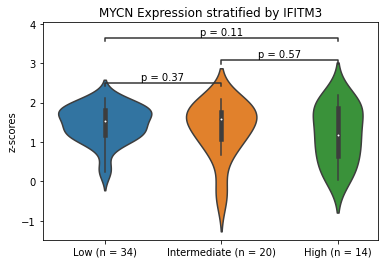

Low: median = 1.5314, mean = 1.465235294117647, 95% CI = (1.3116229595138882, 1.6188476287214058)
Intermediate: median = 1.5754000000000001, mean = 1.322835, 95% CI = (1.016305462783699, 1.629364537216301)
High: median = 1.17635, mean = 1.1840714285714287, 95% CI = (0.8133606326891025, 1.5547822244537548)


In [18]:
data = [low_IFITM3_MYCN_amplified_samples, intermediate_IFITM3_MYCN_amplified_samples, high_IFITM3_MYCN_amplified_samples]
compareExpression2('MYCN',data,'IFITM3',['Low','Intermediate','High'],'t-test_ind')




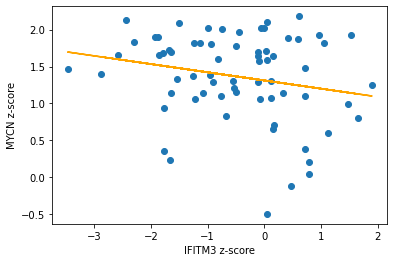

Pearson correlation coefficient = -0.21748449896458297
p-value = 0.07482022037748673


In [19]:
#Stratify samples based on MYCN amplification status
MYCN_groups = stratifyCategoricalSampleData('MYCN', 'Not Amplified', 'Amplified')

#Find z-scores for MYCN amplified samples
amplified_MYCN_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(MYCN_groups[1]).intersection(z_scores.columns))
amplified_MYCN_z_scores = z_scores[amplified_MYCN_columns]

#Obtain the IFITM3 z-scores in amplified MYCN samples
IFITM3_MYCN_amplified_z_scores = amplified_MYCN_z_scores.loc[amplified_MYCN_z_scores['Hugo_Symbol']=='IFITM3'].iloc[:,2:].transpose()

#Obtain the MYCN z-scores in amplified MYCN samples
MYCN_MYCN_amplified_z_scores = amplified_MYCN_z_scores.loc[amplified_MYCN_z_scores['Hugo_Symbol']=='MYCN'].iloc[:,2:].transpose()

plt.scatter(IFITM3_MYCN_amplified_z_scores,MYCN_MYCN_amplified_z_scores)
plt.xlabel('IFITM3 z-score')
plt.ylabel('MYCN z-score')
m,b = np.polyfit(IFITM3_MYCN_amplified_z_scores.iloc[:,0].values,MYCN_MYCN_amplified_z_scores.iloc[:,0].values,1)
plt.plot(IFITM3_MYCN_amplified_z_scores, m*(IFITM3_MYCN_amplified_z_scores.iloc[:,0].values) + b, 'orange')
plt.show()

corr,pvalue = st.pearsonr(IFITM3_MYCN_amplified_z_scores.iloc[:,0].tolist(),MYCN_MYCN_amplified_z_scores.iloc[:,0].tolist())
print('Pearson correlation coefficient = ' + str(corr))
print('p-value = ' + str(pvalue))
